# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

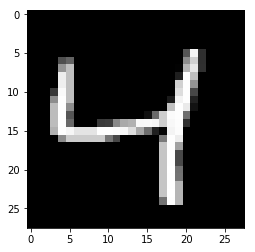

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [9]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_dim = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, (None, image_dim))
targets_ = tf.placeholder(tf.float32, (None, image_dim))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_dim, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [10]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [11]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6935
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6880
Epoch: 1/20... Training loss: 0.6842
Epoch: 1/20... Training loss: 0.6795
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6673
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6493
Epoch: 1/20... Training loss: 0.6420
Epoch: 1/20... Training loss: 0.6289
Epoch: 1/20... Training loss: 0.6156
Epoch: 1/20... Training loss: 0.6032
Epoch: 1/20... Training loss: 0.5867
Epoch: 1/20... Training loss: 0.5714
Epoch: 1/20... Training loss: 0.5544
Epoch: 1/20... Training loss: 0.5401
Epoch: 1/20... Training loss: 0.5213
Epoch: 1/20... Training loss: 0.5076
Epoch: 1/20... Training loss: 0.4901
Epoch: 1/20... Training loss: 0.4739
Epoch: 1/20... Training loss: 0.4551
Epoch: 1/20... Training loss: 0.4436
Epoch: 1/20... Training loss: 0.4255
Epoch: 1/20... Training loss: 0.4090
Epoch: 1/20... Training loss: 0.3952
Epoch: 1/20... Training loss: 0.3865
E

Epoch: 1/20... Training loss: 0.1751
Epoch: 1/20... Training loss: 0.1776
Epoch: 1/20... Training loss: 0.1766
Epoch: 1/20... Training loss: 0.1762
Epoch: 1/20... Training loss: 0.1799
Epoch: 1/20... Training loss: 0.1772
Epoch: 2/20... Training loss: 0.1759
Epoch: 2/20... Training loss: 0.1743
Epoch: 2/20... Training loss: 0.1724
Epoch: 2/20... Training loss: 0.1748
Epoch: 2/20... Training loss: 0.1683
Epoch: 2/20... Training loss: 0.1677
Epoch: 2/20... Training loss: 0.1796
Epoch: 2/20... Training loss: 0.1690
Epoch: 2/20... Training loss: 0.1848
Epoch: 2/20... Training loss: 0.1737
Epoch: 2/20... Training loss: 0.1761
Epoch: 2/20... Training loss: 0.1746
Epoch: 2/20... Training loss: 0.1659
Epoch: 2/20... Training loss: 0.1765
Epoch: 2/20... Training loss: 0.1656
Epoch: 2/20... Training loss: 0.1719
Epoch: 2/20... Training loss: 0.1732
Epoch: 2/20... Training loss: 0.1728
Epoch: 2/20... Training loss: 0.1661
Epoch: 2/20... Training loss: 0.1708
Epoch: 2/20... Training loss: 0.1663
E

Epoch: 2/20... Training loss: 0.1515
Epoch: 2/20... Training loss: 0.1482
Epoch: 2/20... Training loss: 0.1464
Epoch: 2/20... Training loss: 0.1469
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1456
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1485
Epoch: 2/20... Training loss: 0.1435
Epoch: 2/20... Training loss: 0.1450
Epoch: 2/20... Training loss: 0.1405
Epoch: 2/20... Training loss: 0.1477
Epoch: 2/20... Training loss: 0.1487
Epoch: 2/20... Training loss: 0.1472
Epoch: 2/20... Training loss: 0.1404
Epoch: 2/20... Training loss: 0.1462
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1419
Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1438
Epoch: 2/20... Training loss: 0.1501
Epoch: 2/20... Training loss: 0.1458
Epoch: 2/20... Training loss: 0.1439
Epoch: 2/20... Training loss: 0.1448
Epoch: 2/20... Training loss: 0.1441
Epoch: 2/20... Training loss: 0.1399
E

Epoch: 3/20... Training loss: 0.1286
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1274
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1304
Epoch: 3/20... Training loss: 0.1280
Epoch: 3/20... Training loss: 0.1335
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1263
Epoch: 3/20... Training loss: 0.1316
Epoch: 3/20... Training loss: 0.1279
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1250
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1305
Epoch: 3/20... Training loss: 0.1267
Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1311
Epoch: 3/20... Training loss: 0.1273
Epoch: 3/20... Training loss: 0.1314
E

Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1211
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1122
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1233
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1213
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1194
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1207
E

Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1109
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1148
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1127
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1086
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1151
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1086
E

Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1015
Epoch: 6/20... Training loss: 0.1108
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1048
Epoch: 6/20... Training loss: 0.1058
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1053
E

Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1046
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1027
E

Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.1016
Epoch: 8/20... Training loss: 0.1004
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0990
E

Epoch: 8/20... Training loss: 0.1015
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0926
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.1053
E

Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0954
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0986
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.1003
Epoch: 10/20... Training loss: 0.0988
Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0925
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0955
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0987
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0996
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0901
Epoch: 14/20... Training loss: 0.0885
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0908
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0982
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0916
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0898
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0899
Epoch: 15/20... Training loss: 0.0951
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0913
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0979
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0931
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0959
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0882
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0983
Epoch: 17/20... Training loss: 0.0889
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0980
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0922
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0843
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0977
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0967
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0957
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0979
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0972
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

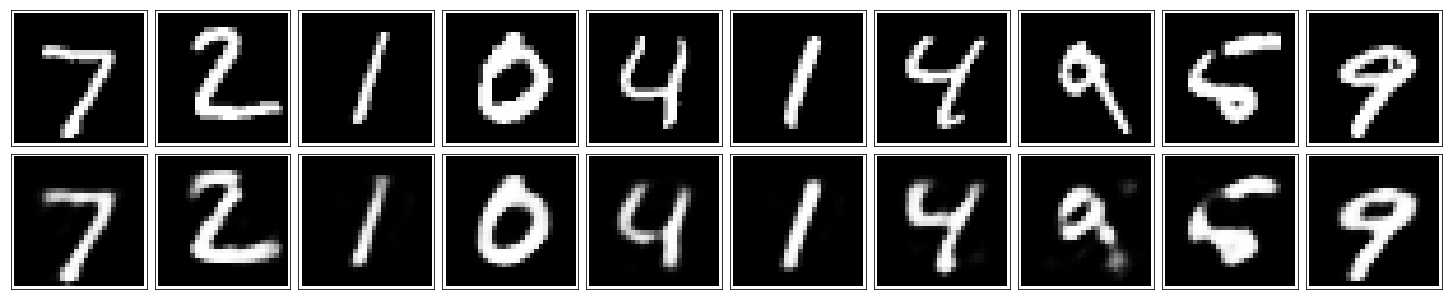

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [13]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.